# EDA 51002
- station id: 51002
- train on 2018, predict on 2022

In [2]:
import numpy as np
import pandas as pd
import torch
# import matplotlib.pyplot as plt

from datetime import datetime
# import folium

In [3]:
root_path = '..'

In [ ]:
df_train = pd.read_csv(f'{root_path}/data/raw/51002h2018.txt', delim_whitespace=True)
df_test = pd.read_csv(f'{root_path}/data/raw/51002h2022.txt', delim_whitespace=True)

df_train.drop(index=0, inplace=True)
df_train.reset_index(drop=True, inplace=True)

df_test.drop(index=0, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train.head()

/tmp/ipykernel_3073502/2918310333.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_train = pd.read_csv(f'{root_path}/data/raw/51002h2018.txt', delim_whitespace=True)
/tmp/ipykernel_3073502/2918310333.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(f'{root_path}/data/raw/51002h2018.txt', delim_whitespace=True)
/tmp/ipykernel_3073502/2918310333.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test = pd.read_csv(f'{root_path}/data/raw/51002h2022.txt', delim_whitespace=True)
/tmp/ipykernel_3073502/2918310333.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2018,01,01,00,00,82,8.8,11.2,99.00,99.00,99.00,999,1014.4,24.7,25.3,17.7,99.0,99.00
1,2018,01,01,00,10,87,8.4,10.6,99.00,99.00,99.00,999,1014.2,24.7,25.3,17.6,99.0,99.00
2,2018,01,01,00,20,82,8.1,10.1,99.00,99.00,99.00,999,1014.2,24.8,25.3,17.7,99.0,99.00
3,2018,01,01,00,30,78,7.8,10.5,99.00,99.00,99.00,999,1014.1,24.8,25.3,17.7,99.0,99.00
4,2018,01,01,00,40,84,7.5,9.6,2.44,7.69,6.24,62,1014.0,24.8,25.3,17.6,99.0,99.00


In [59]:
df_test.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2022,01,01,00,00,174,3.5,6.0,99.00,99.00,99.00,999,1009.1,21.3,25.5,20.2,99.0,99.00
1,2022,01,01,00,10,171,4.5,6.3,99.00,99.00,99.00,999,1009.1,21.5,25.5,20.4,99.0,99.00
2,2022,01,01,00,20,158,4.2,5.3,99.00,99.00,99.00,999,1008.8,21.4,25.5,20.3,99.0,99.00
3,2022,01,01,00,30,175,4.3,5.7,99.00,99.00,99.00,999,1009.0,21.6,25.5,20.4,99.0,99.00
4,2022,01,01,00,40,161,4.7,6.0,1.84,9.09,6.93,86,1008.6,21.8,25.5,20.5,99.0,99.00


In [60]:
df_train.rename(columns={'#YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}, inplace=True)
# df_train['#YY'] = pd.to_numeric(df_train['#YY'])
# df_train['MM'] = pd.to_numeric(df_train['MM'])
# df_train['DD'] = pd.to_numeric(df_train['DD'])
# df_train['hh'] = pd.to_numeric(df_train['hh'])

df_train['time'] = pd.to_datetime(df_train[['year', 'month', 'day', 'hour', 'minute']])
df_train.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

""" curating the data to match Chaichitehrani et al. (2024)
    WDIR - wind direction
    WSPD - wind speed
    GST - wind gust speed
    WVHT - significant wave height (target)
    DPD - dominant wave period
    APD - average wave period (auxiliary target)
    PRES - sea level pressure
    ATMP - air temperature
    WTMP - water temperature
    DEWP - dewpoint temperature
"""

df_train.drop(columns=['MWD', 'VIS', 'TIDE'], inplace=True)

df_train.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,PRES,ATMP,WTMP,DEWP,time
0,82,8.8,11.2,99.00,99.00,99.00,1014.4,24.7,25.3,17.7,2018-01-01 00:00:00
1,87,8.4,10.6,99.00,99.00,99.00,1014.2,24.7,25.3,17.6,2018-01-01 00:10:00
2,82,8.1,10.1,99.00,99.00,99.00,1014.2,24.8,25.3,17.7,2018-01-01 00:20:00
3,78,7.8,10.5,99.00,99.00,99.00,1014.1,24.8,25.3,17.7,2018-01-01 00:30:00
4,84,7.5,9.6,2.44,7.69,6.24,1014.0,24.8,25.3,17.6,2018-01-01 00:40:00


In [61]:
df_test.rename(columns={'#YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}, inplace=True)
# df_test['#YY'] = pd.to_numeric(df_test['#YY'])
# df_test['MM'] = pd.to_numeric(df_test['MM'])
# df_test['DD'] = pd.to_numeric(df_test['DD'])
# df_test['hh'] = pd.to_numeric(df_test['hh'])

df_test['time'] = pd.to_datetime(df_test[['year', 'month', 'day', 'hour', 'minute']])
df_test.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

""" curating the data to match Chaichitehrani et al. (2024)
    WDIR - wind direction
    WSPD - wind speed
    GST - wind gust speed
    WVHT - significant wave height (target)
    DPD - dominant wave period
    APD - average wave period (auxiliary target)
    PRES - sea level pressure
    ATMP - air temperature
    WTMP - water temperature
    DEWP - dewpoint temperature
"""

df_test.drop(columns=['MWD', 'VIS', 'TIDE'], inplace=True)

df_test.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,PRES,ATMP,WTMP,DEWP,time
0,174,3.5,6.0,99.00,99.00,99.00,1009.1,21.3,25.5,20.2,2022-01-01 00:00:00
1,171,4.5,6.3,99.00,99.00,99.00,1009.1,21.5,25.5,20.4,2022-01-01 00:10:00
2,158,4.2,5.3,99.00,99.00,99.00,1008.8,21.4,25.5,20.3,2022-01-01 00:20:00
3,175,4.3,5.7,99.00,99.00,99.00,1009.0,21.6,25.5,20.4,2022-01-01 00:30:00
4,161,4.7,6.0,1.84,9.09,6.93,1008.6,21.8,25.5,20.5,2022-01-01 00:40:00


In [62]:
df_train[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP']] = df_train[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP']].astype(float)

# df_train = df_train[df_train['time'].dt.minute == 0]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52404 entries, 0 to 52403
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    52404 non-null  float64       
 1   WSPD    52404 non-null  float64       
 2   GST     52404 non-null  float64       
 3   WVHT    52404 non-null  float64       
 4   DPD     52404 non-null  float64       
 5   APD     52404 non-null  float64       
 6   PRES    52404 non-null  float64       
 7   ATMP    52404 non-null  float64       
 8   WTMP    52404 non-null  float64       
 9   DEWP    52404 non-null  float64       
 10  time    52404 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.4 MB


In [63]:
df_test[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP']] = df_test[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP']].astype(float)

# df_test = df_test[df_test['time'].dt.minute == 0]

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52486 entries, 0 to 52485
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    52486 non-null  float64       
 1   WSPD    52486 non-null  float64       
 2   GST     52486 non-null  float64       
 3   WVHT    52486 non-null  float64       
 4   DPD     52486 non-null  float64       
 5   APD     52486 non-null  float64       
 6   PRES    52486 non-null  float64       
 7   ATMP    52486 non-null  float64       
 8   WTMP    52486 non-null  float64       
 9   DEWP    52486 non-null  float64       
 10  time    52486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.4 MB


In [64]:
df_train = df_train[df_train['WVHT'] != 99.0]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8722 entries, 4 to 52402
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    8722 non-null   float64       
 1   WSPD    8722 non-null   float64       
 2   GST     8722 non-null   float64       
 3   WVHT    8722 non-null   float64       
 4   DPD     8722 non-null   float64       
 5   APD     8722 non-null   float64       
 6   PRES    8722 non-null   float64       
 7   ATMP    8722 non-null   float64       
 8   WTMP    8722 non-null   float64       
 9   DEWP    8722 non-null   float64       
 10  time    8722 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 817.7 KB


In [65]:
df_test = df_test[df_test['WVHT'] != 99.0]

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9265 entries, 4 to 52484
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    9265 non-null   float64       
 1   WSPD    9265 non-null   float64       
 2   GST     9265 non-null   float64       
 3   WVHT    9265 non-null   float64       
 4   DPD     9265 non-null   float64       
 5   APD     9265 non-null   float64       
 6   PRES    9265 non-null   float64       
 7   ATMP    9265 non-null   float64       
 8   WTMP    9265 non-null   float64       
 9   DEWP    9265 non-null   float64       
 10  time    9265 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 868.6 KB


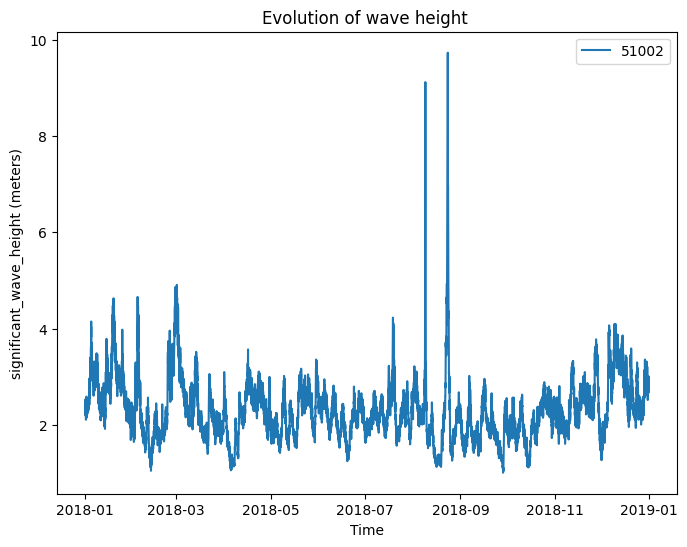

In [66]:
start_date = df_train['time'].min()
# end_date = start_date + pd.DateOffset(hours=12)
end_date = df_train['time'].max()

df_slice = df_train[(df_train['time'] >= start_date) & (df_train['time'] <= end_date)]

plt.figure(figsize=(8, 6))
plt.plot(df_slice['time'], df_slice['WVHT'],label="51002")

plt.xlabel('Time')
plt.ylabel('significant_wave_height (meters)')
plt.title('Evolution of wave height ')
plt.legend()

plt.show()

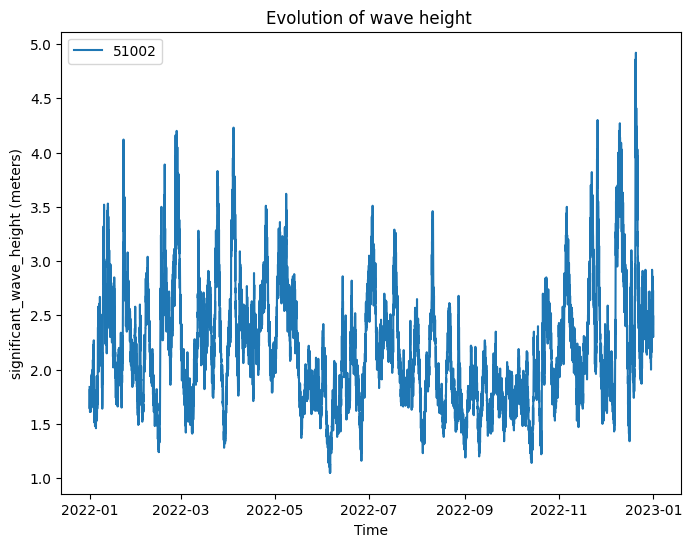

In [67]:
start_date = df_test['time'].min()
# end_date = start_date + pd.DateOffset(hours=12)
end_date = df_test['time'].max()

df_slice = df_test[(df_test['time'] >= start_date) & (df_test['time'] <= end_date)]

plt.figure(figsize=(8, 6))
plt.plot(df_slice['time'], df_slice['WVHT'],label="51002")

plt.xlabel('Time')
plt.ylabel('significant_wave_height (meters)')
plt.title('Evolution of wave height ')
plt.legend()

plt.show()

### Saving the data as torch tensors

In [68]:
X_train = torch.tensor(df_train.drop(columns=['time'], axis=1).values, dtype=torch.float32)
y_train = torch.tensor(df_train['WVHT'].values, dtype=torch.float32)

X_test = torch.tensor(df_test.drop(columns=['time']).values, dtype=torch.float32)
y_test = torch.tensor(df_test['WVHT'].values, dtype=torch.float32)

tensor_dict = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test
}

torch.save(tensor_dict, f'{root_path}/data/pt/waves-51002.pt')

test loading the data back in from .pt

In [70]:
loaded_data = torch.load(f'{root_path}/data/pt/waves-51002.pt')

print(loaded_data['X_train'].shape)
print(loaded_data['y_train'].shape)
print(loaded_data['X_test'].shape)
print(loaded_data['y_test'].shape)

torch.Size([8722, 10])
torch.Size([8722])
torch.Size([9265, 10])
torch.Size([9265])


/var/folders/d0/7p4xxyy97qbb5_f74yjfh9vw0000gp/T/ipykernel_50992/3829553415.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(f'{root_path}/data/p